<a href="https://colab.research.google.com/github/maegop/Exploratory-Data-Analysis-for-US-Accidents/blob/main/EDA_US_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis for US Accidents 

### Kaggle description for the data set
<p> The US is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2020, using two APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 4.2 million accident records in this dataset.
</p>

<p>
This dataset has been collected in real-time, using multiple Traffic APIs. Currently, it contains accident data that are collected from February 2016 to Dec 2020 for the Contiguous United States.
</p>


### Summary


*   Informaiton about accidents
*   Can bse useful to prevent accidents


### Installation of Python Libraries

In [1]:
#Library for dataset downloading
!pip install opendatasets --upgrade --quiet

### Import data from Source

In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: maegop
Your Kaggle Key: ··········


  0%|          | 0.00/299M [00:00<?, ?B/s]

100%|██████████| 299M/299M [00:04<00:00, 74.1MB/s]


In [3]:
# Import data set from CSV
data_filename = './us-accidents/US_Accidents_Dec20.csv'

### Data Preparation and Cleaning
* Load the file using Pandas
* Look at some information about the data & the columns
* Fix any missing or incorrect values

In [4]:
import pandas as pd

df = pd.read_csv(data_filename)

In [5]:
df

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232536,A-4239402,Bing,NaN,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4232537,A-4239403,Bing,NaN,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4232538,A-4239404,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4232539,A-4239405,Bing,NaN,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles

Summary of Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [10]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.716477e+06,4.232541e+06,4.232541e+06,4.232541e+06,1.516064e+06,1.516064e+06,4.232541e+06,1.544592e+06,4.142641e+06,2.336540e+06,4.137074e+06,4.156157e+06,4.133873e+06,3.753215e+06,2.166952e+06
mean,2.083517e+02,2.305035e+00,3.639782e+01,-9.546420e+01,3.690061e+01,-9.859901e+01,3.357021e-01,6.141507e+03,6.147799e+01,5.489319e+01,6.567422e+01,2.969371e+01,9.111991e+00,7.903433e+00,1.244719e-02
std,2.124413e+01,5.332261e-01,4.964404e+00,1.735319e+01,5.165629e+00,1.849590e+01,1.602143e+00,1.492268e+04,1.852586e+01,2.272355e+01,2.272342e+01,8.639260e-01,2.817582e+00,5.330998e+00,1.637154e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.352058e+01,-1.173570e+02,3.385420e+01,-1.182077e+02,0.000000e+00,8.980000e+02,4.900000e+01,3.800000e+01,4.900000e+01,2.964000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.582542e+01,-9.002078e+01,3.735134e+01,-9.437987e+01,0.000000e+00,2.890000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.993000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.018313e+01,-8.084682e+01,4.072593e+01,-8.087449e+01,8.900000e-02,7.330000e+03,7.520000e+01,7.300000e+01,8.500000e+01,3.008000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,9.999997e+06,2.030000e+02,1.890000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.500000e+01


In [6]:
# Find the numeric columns in the Ddata set
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

15

### Missing Value Count and Percentage

In [7]:
df.isna().sum().sort_values(ascending=False)

End_Lat                  2716477
End_Lng                  2716477
Number                   2687949
Precipitation(in)        2065589
Wind_Chill(F)            1896001
TMC                      1516064
Wind_Speed(mph)           479326
Visibility(mi)             98668
Weather_Condition          98383
Humidity(%)                95467
Temperature(F)             89900
Wind_Direction             83611
Pressure(in)               76384
Weather_Timestamp          62644
Airport_Code                8973
Timezone                    4615
Zipcode                     1292
Nautical_Twilight            141
Astronomical_Twilight        141
Civil_Twilight               141
Sunrise_Sunset               141
City                         137
Description                    2
Amenity                        0
Street                         0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng 

In [8]:
# Percentages of missing values by column
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages*100 #%

End_Lat                  64.180760
End_Lng                  64.180760
Number                   63.506745
Precipitation(in)        48.802575
Wind_Chill(F)            44.795809
TMC                      35.819240
Wind_Speed(mph)          11.324781
Visibility(mi)            2.331176
Weather_Condition         2.324443
Humidity(%)               2.255548
Temperature(F)            2.124020
Wind_Direction            1.975433
Pressure(in)              1.804684
Weather_Timestamp         1.480057
Airport_Code              0.212000
Timezone                  0.109036
Zipcode                   0.030525
Nautical_Twilight         0.003331
Astronomical_Twilight     0.003331
Civil_Twilight            0.003331
Sunrise_Sunset            0.003331
City                      0.003237
Description               0.000047
Amenity                   0.000000
Street                    0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time            

In [24]:
type(missing_percentages)

pandas.core.series.Series

Missing Values Visualization

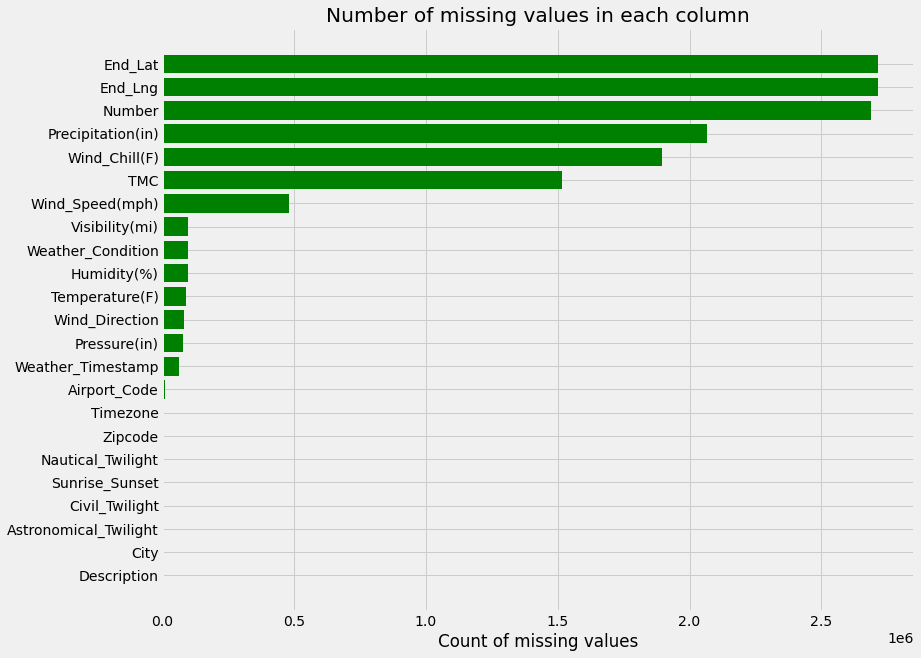

In [23]:
#missing_percentages[missing_percentages > 0].plot(kind='bar')
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name','missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.5
fig,ax = plt.subplots(figsize=(12,10))
rects = ax.barh(ind,missing_df.missing_count.values,color='green')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

## Exploratory Analysis and Visualization
Columns wil be analyzed:

* City / States
* Start Lat, Start Lng
* Start Time
* Temperature
* Weather Condition

### Visualization by City
Get the number of unique cities in the Data set

In [32]:
cities = df.City.unique()
len(cities)

12251

Numer of accidents by City

In [89]:
cities_by_accident = df.City.value_counts()
cities_by_accident.head(20)

Houston          114905
Los Angeles       92701
Charlotte         88887
Dallas            77303
Austin            70538
Miami             63162
Raleigh           52876
Atlanta           46328
Baton Rouge       42814
Nashville         41850
Orlando           39561
Oklahoma City     39484
Sacramento        38061
Phoenix           32805
Minneapolis       31781
San Diego         29416
Seattle           28004
Richmond          27907
San Antonio       27516
Jacksonville      24009
Name: City, dtype: int64

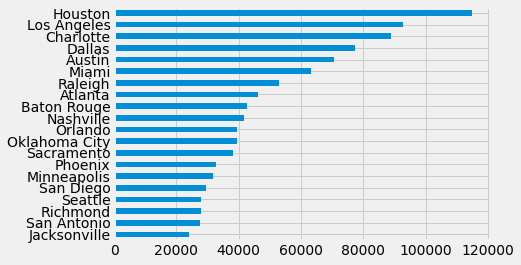

In [50]:
cities_by_accident[:20].sort_values(ascending=True).plot(kind='barh')

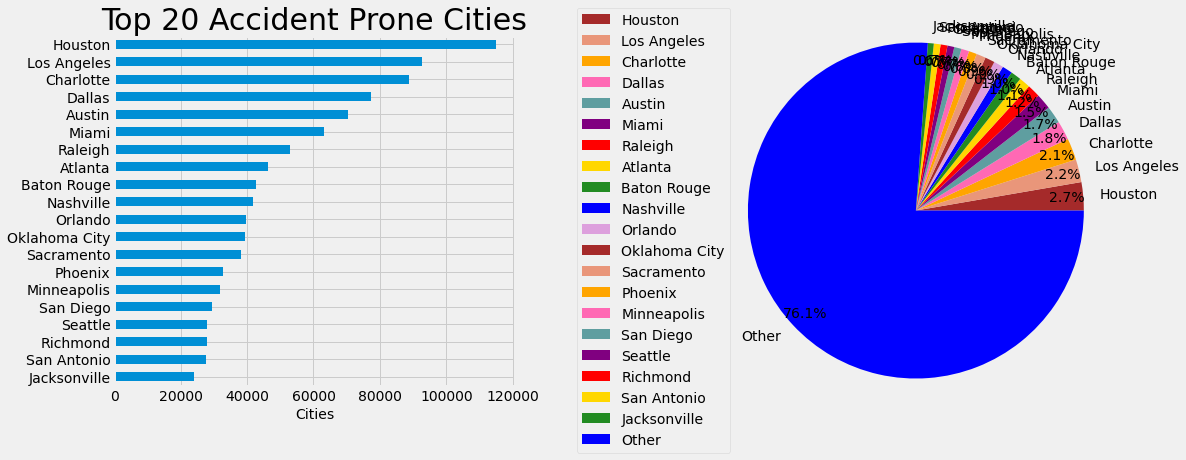

In [71]:
fig,ax=plt.subplots(1,2,figsize=(16,6))

#Bar Plotting
df.City.value_counts().sort_values(ascending=False)[:20].sort_values().plot(kind='barh',ax=ax[0])
ax[0].set_title("Top 20 Accident Prone Cities",size=30)
ax[0].set_xlabel('Cities',size=14)

# Pie Chart Plotting
count=df['City'].value_counts()
groups=list(df['City'].value_counts().index)[:20]
counts=list(count[:20])
counts.append(count.agg(sum)-count[:20].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(-0.01,1.1)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')
pass

### Visualization by State
The States with more accidents are CA, TX and FL

In [90]:
states_accident = df.State.value_counts()
states_accident.head(20)

CA    972585
TX    376445
FL    370131
SC    212712
NC    193457
NY    189513
PA    136049
VA    127949
IL    111712
OR    108352
GA    107116
MI    105772
MN    105497
AZ     93103
TN     88495
LA     80560
WA     74705
OH     73161
MD     69958
NJ     69167
Name: State, dtype: int64

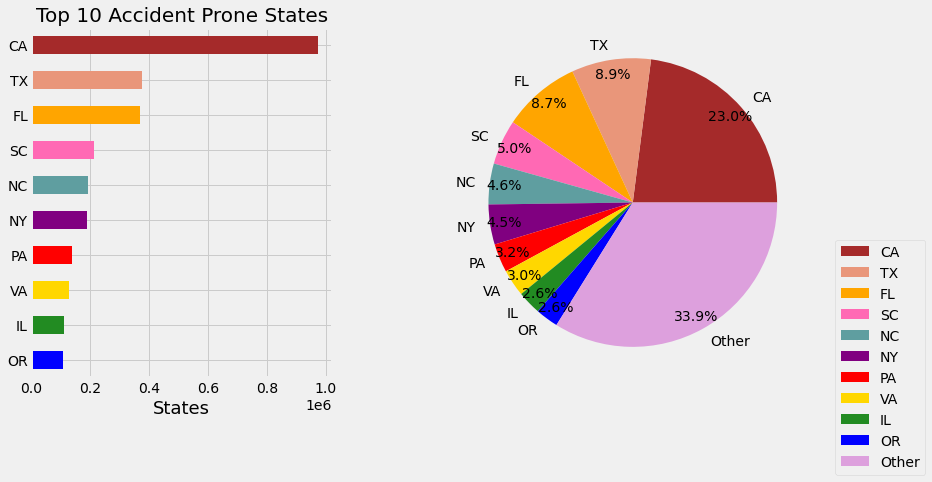

In [47]:
fig,ax=plt.subplots(1,2,figsize=(12,6))

#Bar Plotting
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
df.State.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 Accident Prone States",size=20)
ax[0].set_xlabel('States',size=18)

# Pie Chart Plotting
count=df['State'].value_counts()
groups=list(df['State'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')
pass

### Visualization by Start Latitude & Longitude

In [75]:
import seaborn as sns
sns.set_style("darkgrid")

df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
4232536    34.002480
4232537    32.766960
4232538    33.775450
4232539    33.992460
4232540    34.133930
Name: Start_Lat, Length: 4232541, dtype: float64

In [73]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
4232536   -117.379360
4232537   -117.148060
4232538   -117.847790
4232539   -118.403020
4232540   -117.230920
Name: Start_Lng, Length: 4232541, dtype: float64

In [74]:
sample_df = df.sample(int(0.1 * len(df)))

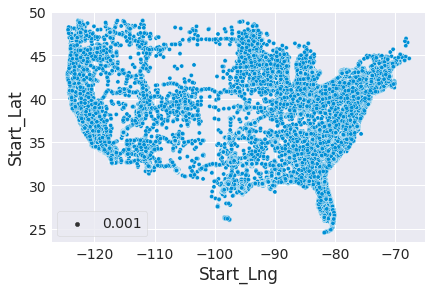

In [78]:
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [83]:
import folium
from folium.plugins import HeatMap

lat, lon = df.Start_Lat[0], df.Start_Lng[0]

for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])

1208820    40.723507
2170411    41.471069
149341     33.781532
4181619    39.924953
2304582    41.804359
             ...    
353783     26.563713
2831847    34.466930
4086097    39.807360
3384468    34.264018
1247357    36.122673
Name: Start_Lat, Length: 1000, dtype: float64
1208820    -73.775833
2170411    -87.324142
149341     -84.390869
4181619    -86.267845
2304582    -72.658829
              ...    
353783     -81.985931
2831847   -118.326030
4086097    -86.274800
3384468   -118.441785
1247357    -86.751488
Name: Start_Lng, Length: 1000, dtype: float64


In [84]:
zip(list(df.Start_Lat), list(df.Start_Lng))

In [ ]:
sample_df = df.sample(int(0.001 * len(df)))
lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

### Visualization by Start Time

In [20]:
import numpy as np
df['Start_Time'].head(5)

0    2016-02-08 05:46:00
1    2016-02-08 06:07:59
2    2016-02-08 06:49:27
3    2016-02-08 07:23:34
4    2016-02-08 07:39:07
Name: Start_Time, dtype: object

In [26]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [27]:
df['Start_Time'].head(5)

0   2016-02-08 05:46:00
1   2016-02-08 06:07:59
2   2016-02-08 06:49:27
3   2016-02-08 07:23:34
4   2016-02-08 07:39:07
Name: Start_Time, dtype: datetime64[ns]

**Hour Insights**
* A high percentage of accidents occur between 6 am to 10 am 
*Next higest percentage is 3 pm to 6 pm.

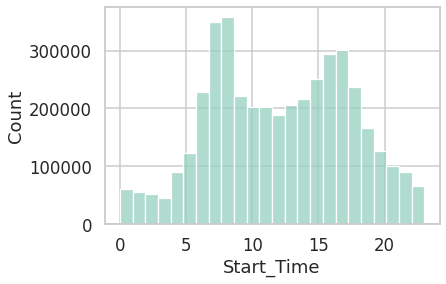

In [46]:
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('GnBu_d')

sns.histplot(data=df.Start_Time.dt.hour, bins=24, kde=False)


**Week days and Weekends Insights**
* Week days are more accidents than weekends

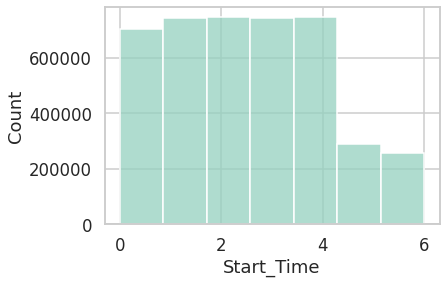

In [49]:
sns.histplot(data=df.Start_Time.dt.dayofweek, bins=7, kde=False)

**Month Insights**
* More accidents are in Winter


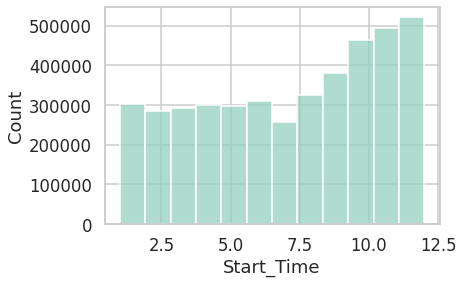

In [50]:
sns.histplot(data=df.Start_Time.dt.month, bins=12, kde=False)

## Insights


* Less than 5% of cities have more than 1000 yearly accidents.
* Over 1200 cities have reported just one accident (need to investigate)